<a href="https://colab.research.google.com/github/BraedenTd/CMPS385SpringSemester/blob/main/Assignment_3_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 16511 images belonging to 1 classes.
Found 4127 images belonging to 1 classes.
Epoch 1/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 607s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 603s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 595s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


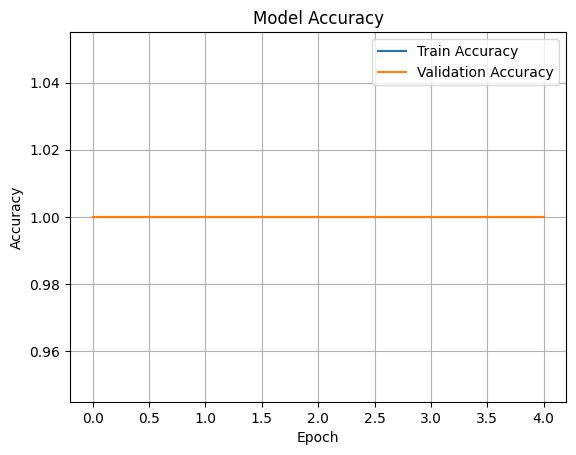

In [9]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# === Dataset path (zipped file) ===
zip_file_path = "/content/sample_data/plantvillage.zip"

# === Extract the zip file ===
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/sample_data/plantvillage")  # Extract to 'plantvillage' directory

# === Dataset path (extracted folder) ===
data_dir = "/content/sample_data/plantvillage"  # Update data_dir to point to the extracted folder
img_size = (128, 128)
batch_size = 32

# === Prepare Image Data Generators ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# === CNN Model Architecture ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')  # Auto-match number of disease classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Train the Model ===
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)

# === Plot Accuracy ===
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# === Save the Model ===
model.save('/content/Output Data/plant_disease_model.keras')
